# Bayesian hypothesis testing

## Are Melbourne temperatures rising?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(16, 9)

In [2]:
melb_temp = pd.read_csv('../Data/melbourne-temp.csv')

In [3]:
melb_temp[:5]

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality
0,IDCJAC0002,86351,1979,9,16.1,Y
1,IDCJAC0002,86351,1979,10,19.2,Y
2,IDCJAC0002,86351,1979,11,22.3,Y
3,IDCJAC0002,86351,1979,12,26.8,Y
4,IDCJAC0002,86351,1980,1,24.7,Y


In [4]:
melb_temp['Decimal date'] = melb_temp['Year'] + (melb_temp['Month'] - 1) / 12

In [5]:
t = melb_temp[['Decimal date', 'Mean maximum temperature (°C)']].set_index('Decimal date')

In [6]:
%matplotlib inline

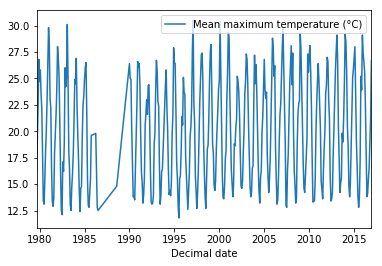

In [7]:
t.plot()

In [8]:
t.loc[1985:1986]

,Mean maximum temperature (°C)
Decimal date,
1985.000000,24.9
1985.083333,26.0
1985.166667,26.5
1985.250000,21.8
1985.333333,15.4
1985.416667,13.0
1985.500000,12.8
1985.583333,14.1
1985.666667,15.5


Let's model the temperature as having a cyclic component (12-monthly cycle), with unknown offset, and a linear trend, whose slope is unknown.

$$
y = a t + b + c \space sin(2 \pi [t + d]) + \epsilon
$$

In [9]:
import pymc3 as pm
import numpy as np

1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33 //preprocessor macro 

737     if (!newdims)
738     {
739         PyErr_SetString(PyExc_MemoryError,
740             "CudaNdarray_Zeros: Failed to allocate temporary space");
741         return NULL;
742     }
743 
744     // start from the end to compute strides
745     for (int i = shplen-1; i >= 0; --i)
746     {
747         PyObject* shp_el_obj = PySequence_GetItem(shape, i);
748         if(shp_el_obj == NULL)
749         {
750             // shouldn't happen since we checked length before...
751             PyErr_SetString(PyExc_RuntimeError, "CudaNdarray_Zeros: Index out of bound in sequence");
752             free(newdims);
753             return NULL;
754         }
755 
756         int shp_el = PyInt_AsLong(shp_el_obj);
757         Py_DECREF(shp_el_obj);
758 
759         if (shp_el < 0)
760         {
761             PyErr_SetString(PyExc_ValueError, "CudaNdarray_Zeros: shape must contain only non-negative values for size of a dimension");
762             free(newdims);
763             return NULL;
7

1816                         cudaGetErrorString(err));
1817                     Py_XDECREF(new_other);
1818                     return -1;
1819                 }
1820             }
1821             break;
1822         case 1:
1823             {
1824                 dim3 n_blocks(1, 1, 1);
1825                 dim3 n_threads(
1826                         std::min(
1827                             CudaNdarray_HOST_DIMS(self)[0],
1828                             NUM_VECTOR_OP_THREADS_PER_BLOCK));
1829                 k3<<<n_blocks, n_threads>>>(
1830                         1, //dimensions
1831                         1,
1832                         CudaNdarray_HOST_DIMS(self)[0],
1833                         CudaNdarray_DEV_DATA(self),
1834                         1, //strides
1835                         1,
1836                         CudaNdarray_HOST_STRIDES(self)[0],
1837                         CudaNdarray_DEV_DATA(other),
1838                         1, //strides
1839              

3027         (getter)CudaNdarray_get_dtype,
3028         NULL,
3029         "The dtype of the element. Now always float32",
3030         NULL},
3031     {"size",
3032         (getter)CudaNdarray_SIZE_Object,
3033         NULL,
3034         "The number of elements in this object.",
3035         NULL},
3036     //mem_size is neede for pycuda.elementwise.ElementwiseKernel Why do they use size and mem_size of the same value?
3037     {"mem_size",
3038         (getter)CudaNdarray_SIZE_Object,
3039         NULL,
3040         "The number of elements in this object.",
3041         NULL},
3042     {"ndim",
3043         (getter)CudaNdarray_get_ndim,
3044         NULL,
3045         "The number of dimensions in this object.",
3046         NULL},
3047     {"base",
3048         (getter)CudaNdarray_get_base,
3049         NULL,
3050         "If this ndarray is a view, base is the original ndarray.",
3051         NULL},
3052 
3053     {NULL, NULL, NULL, NULL}  /* Sentinel */
3054 };
3055 
3056 PyObject

4161 
4162     // If matrix A or B has non-unit size and non-unit stride in both
4163     // dimensions, we can make a copy.
4164     CudaNdarray * A_new = NULL;
4165     CudaNdarray * B_new = NULL;
4166     if (((CudaNdarray_HOST_DIMS(A)[0] > 1)
4167          && (CudaNdarray_HOST_STRIDES(A)[0] != 1)
4168          && (CudaNdarray_HOST_DIMS(A)[1] > 1)
4169          && (CudaNdarray_HOST_STRIDES(A)[1] != 1))
4170         || (CudaNdarray_HOST_STRIDES(A)[0] < 0)
4171         || (CudaNdarray_HOST_STRIDES(A)[1] < 0))
4172     {
4173         A_new = (CudaNdarray*) CudaNdarray_Copy(A);
4174         if (!A_new)
4175             return -1;
4176         A = A_new;
4177     }
4178 
4179     if (((CudaNdarray_HOST_DIMS(B)[0] > 1)
4180          && (CudaNdarray_HOST_STRIDES(B)[0] != 1)
4181          && (CudaNdarray_HOST_DIMS(B)[1] > 1)
4182          && (CudaNdarray_HOST_STRIDES(B)[1] != 1))
4183         || (CudaNdarray_HOST_STRIDES(B)[0] < 0)
4184         || (CudaNdarray_HOST_STRIDES(B)[1] < 0))
4185 


['nvcc', '-shared', '-O3', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,-fPIC,-fvisibility=hidden', '-Xlinker', '-rpath,/Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.1-64/cuda_ndarray', '-I/Users/schofield/anaconda/envs/bayesml/lib/python3.6/site-packages/theano/sandbox/cuda', '-I/Users/schofield/anaconda/envs/bayesml/lib/python3.6/site-packages/numpy/core/include', '-I/Users/schofield/anaconda/envs/bayesml/include/python3.6m', '-I/Users/schofield/anaconda/envs/bayesml/lib/python3.6/site-packages/theano/gof', '-L/Users/schofield/anaconda/envs/bayesml/lib', '-o', '/Users/schofield/.theano/compiledir_Darwin-16.6.0-x86_64-i386-64bit-i386-3.6.1-64/cuda_ndarray/cuda_ndarray.so', 'mod.cu', '-lcublas', '-lcudart', '-Xcompiler', '-undefined,dynamic_lookup', '-Xlinker', '-pie']


In [10]:
with pm.Model() as model2:
    sigma = pm.Uniform('sigma', 0, 15)
    
    a = pm.Uniform('a', -0.1, 0.1)
    b = pm.Uniform('b', 10, 35)
    c = pm.Uniform('c', 10, 15)   # half difference between summer and winter temperature: 10 and 35, say
    d = pm.Uniform('d', 0, 0.2)   # peak summer is somewhere between Jan 01 and end of Feb

    times = np.array(t.index)
    y = pm.Normal('y', a * times + b + c * pm.math.sin(2 * np.pi * (times + d)), sigma,
                  observed=t.values)

In [11]:
with model:
    trace = pm.sample(1000, tune=500)

NameError: name 'model' is not defined

In [ ]:
pm.traceplot(trace);

In [ ]:
a_samples = trace['a']
b_samples = trace['b']
c_samples = trace['c']
d_samples = trace['d']
sigma_samples = trace['sigma']

In [ ]:
plt.hist(a_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $a$", color="#7A68A6", normed=True);

What is the probability that the mean temperature is rising, i.e. $a > 0$?